# Mối quan hệ của các thuộc tính High, No. of Shares, No. of Trade

##### Khai báo thư viện 

In [2]:
#Import các thư viện 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

##### Đọc file đã xử lý

In [3]:
path = './deccan gold mines ltd eod price(da_xu_ly).csv'
df = pd.read_csv(path, parse_dates=['Date'])
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2023-04-13,50.47,50.47,47.86,49.15,49.35,122650,413,6053293,99475.0,81.10,2.61,-1.32
1,2023-12-04,49.98,51.00,49.30,50.07,49.99,193359,417,9665903,166630.0,86.18,1.70,0.09
2,2023-11-04,48.87,50.05,47.76,49.90,49.21,270964,509,13335488,208486.0,76.94,2.29,1.03
3,2023-10-04,51.49,51.49,48.00,48.16,49.90,339774,517,16954583,280083.0,82.43,3.49,-3.33
4,2023-06-04,48.40,49.04,47.65,49.04,48.80,245835,441,11996688,203526.0,82.79,1.39,0.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4812 non-null   datetime64[ns]
 1   Open                       4812 non-null   float64       
 2   High                       4812 non-null   float64       
 3   Low                        4812 non-null   float64       
 4   Close                      4812 non-null   float64       
 5   WAP                        4812 non-null   float64       
 6   No. of Shares              4812 non-null   int64         
 7   No. of Trades              4812 non-null   int64         
 8   Total Turnover             4812 non-null   int64         
 9   Deliverable Quantity       4812 non-null   float64       
 10  % Deli. Qty to Traded Qty  4812 non-null   float64       
 11  Spread H-L                 4812 non-null   float64       
 12  Spread

### Sự tương quan giữa 3 thuộc tính High, No. of Shares, No. of Trade

- Hệ số tương quan là chỉ số thống kê đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến số. Trong đó:
    - Hệ số tương quan có giá trị từ -1.0 đến 1.0. Kết quả được tính ra lớn hơn 1.0 hoặc nhỏ hơn -1 có nghĩa là có lỗi trong phép đo tương quan.
    - Hệ số tương quan có giá trị âm cho thấy hai biến có mối quan hệ nghịch biến hoặc tương quan âm (nghịch biến tuyệt đối khi giá trị bằng -1).
    - Hệ số tương quan có giá trị dương cho thấy mối quan hệ đồng biến hoặc tương quan dương (đồng biến tuyệt đối khi giá trị bằng 1).
    - Tương quan bằng 0 cho hai biến độc lập với nhau.

- Tạo biểu đồ Heatmap thể hiện độ tương quan giữa các biến với nhau

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\1867085286.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = "pearson") #Sử dụng hệ số tương quan Pearson
C:\Users\HP\AppData\Local\Temp\ipykernel_6444\1867085286.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = "Blues", square = True, ax = ax)


<AxesSubplot: >

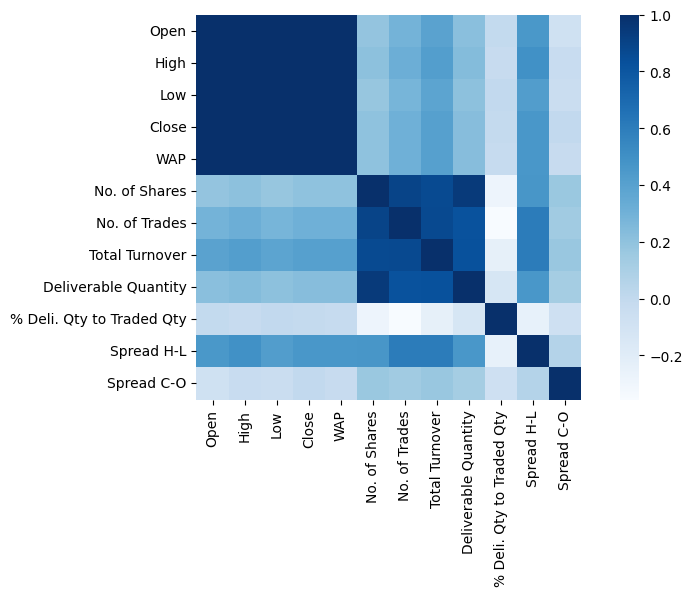

In [5]:
#Correlation Map 

corr = df.corr(method = "pearson") #Sử dụng hệ số tương quan Pearson
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = "Blues", square = True, ax = ax)

##### Nhận Xét:
- Từ đồ thị có thể thấy thuộc tính High có mối tương quan khá ít với No. of Shares và No. of Trades.
- Ngược lại, No. of Shares và No. of Trades có mối tương quan thuận với nhau.

#### Biểu đồ Boxplot thể hiện sự phân phối dữ liệu của 3 thuộc tính

Text(0.5, 0, 'No. of Trades')

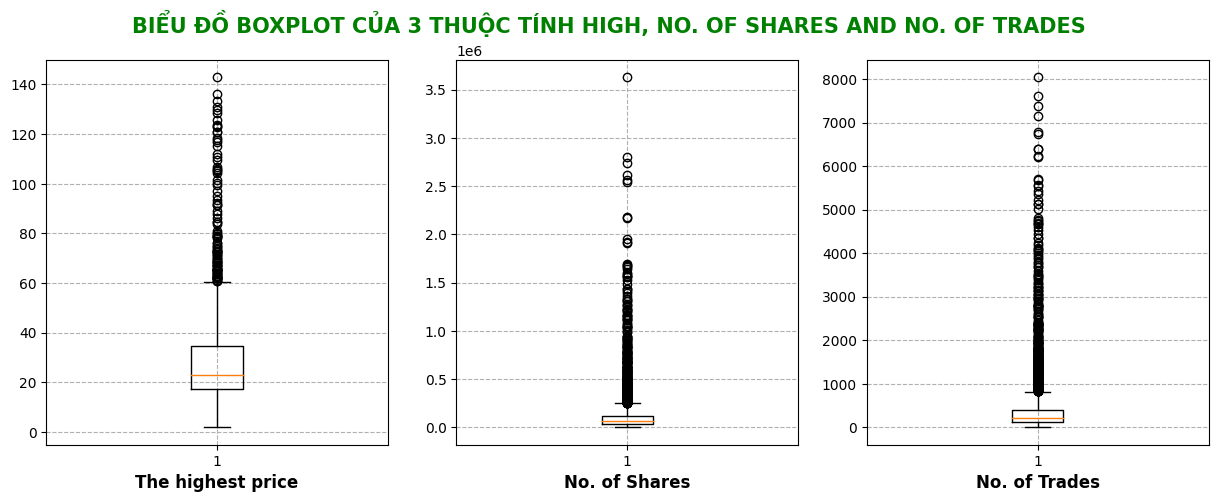

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1.boxplot(df['High'])
ax1.grid(True, linestyle = "--")

ax2.boxplot(df['No. of Shares'])
ax2.grid(True, linestyle = "--")

ax3.boxplot(df['No. of Trades'])
ax3.grid(True, linestyle = "--")

fig.suptitle("BIỂU ĐỒ BOXPLOT CỦA 3 THUỘC TÍNH HIGH, NO. OF SHARES AND NO. OF TRADES", fontsize = 15, color = "green", fontweight = "bold")
ax1.set_xlabel("The highest price", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("No. of Shares", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("No. of Trades", fontsize = 12, fontweight = "bold")

##### Nhận Xét:
- Cả 3 thuộc tính đều xuất hiện nhiều outliers nằm ở phía trên.
- Cả 3 thuộc tính đều có xu hướng lệch phải.

### Sự thay đổi của 3 thuộc tính High, No. of Shares, No. of Trade qua các năm

##### Thêm cột năm

In [7]:
df['Year'] = [d.year for d in df['Date']]
df

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Year
0,2023-04-13,50.47,50.47,47.86,49.15,49.350000,122650,413,6053293,99475.0,81.10,2.61,-1.32,2023
1,2023-12-04,49.98,51.00,49.30,50.07,49.990000,193359,417,9665903,166630.0,86.18,1.70,0.09,2023
2,2023-11-04,48.87,50.05,47.76,49.90,49.210000,270964,509,13335488,208486.0,76.94,2.29,1.03,2023
3,2023-10-04,51.49,51.49,48.00,48.16,49.900000,339774,517,16954583,280083.0,82.43,3.49,-3.33,2023
4,2023-06-04,48.40,49.04,47.65,49.04,48.800000,245835,441,11996688,203526.0,82.79,1.39,0.64,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,1996-09-07,6.25,6.25,6.25,6.25,6.250000,100,1,625,51465.0,81.42,0.00,0.00,1996
4808,1996-08-07,4.85,4.85,4.85,4.85,4.850000,100,1,485,51465.0,81.42,0.00,0.00,1996
4809,1996-05-07,3.75,3.75,3.75,3.75,3.746667,150,2,562,51465.0,81.42,0.00,0.00,1996
4810,1996-04-07,2.90,2.90,2.90,2.90,2.900000,100,1,290,51465.0,81.42,0.00,0.00,1996


#### A. Highest Price qua các năm
- Highest Price của giá vàng là giá cao nhất mà vàng đạt được trong ngày giai dịch

Lấy dữ liệu các năm gần đây để dễ so sánh sự thay đổi

In [8]:
df_year = df[df['Year'] >= 2010]
df_high_year = df_year.groupby('Year')['High'].mean()


Vẽ biểu đồ 
- Biểu đồ chọn để trực quan: Biểu đồ đường
- Nguyên nhân: Biểu đồ đường khá hữu dụng cho việc biểu diễn sự thay đổi của 1 biến theo thời gian

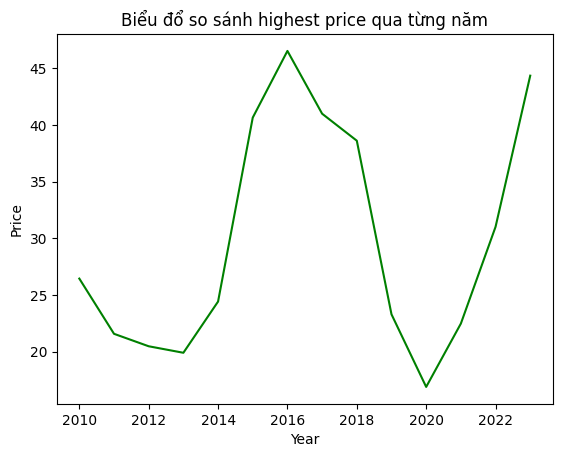

In [9]:
plt.plot(df_high_year, color='green')
plt.gca().set(title= "Biểu đổ so sánh highest price qua từng năm", xlabel= "Year", ylabel= "Price")
plt.show()

Nhận Xét:
- Giai đoạn 2010 - 2013, Highest price của vàng có sự biến động khá lớn.
- Từ năm 2010 - 2016, Highest price của vàng có xu hướng tăng nhiều hơn. Từ năm 2016 - 2018 thì giảm nhẹ.
- Giai đoạn Covid-19 (2019 - 2020), Highest price của vàng tụt dốc chỉ phục hồi lại và tăng cao sau Covid-19 (2021 - nay)    
- Các kỹ thuật được áp dụng: Manipulate View (Thay đổi màu sắc, định dạng biểu đồ, thay đổi tiêu đề). Khi ta áp dụng kỹ thuật này sẽ cho ta dễ thấy được sự thay đổi Highest price của vàng qua từng năm.
- Từ việc trực quan hóa, biểu đồ trên giúp ta thấy được Highest price đang phục hồi khá nhiều sau Covid-19 từ đó giúp ích cho việc đầu tư.

#### So sánh giữa Highest Price, Lowest Price, Open Price, Close Price qua các năm

- Lấy trung bình theo các năm

In [14]:
df_open_year = df_year.groupby('Year')['Open'].mean()
df_close_year = df_year.groupby('Year')['High'].mean()
df_low_year = df_year.groupby('Year')['Low'].mean()

- Vẽ biểu đồ

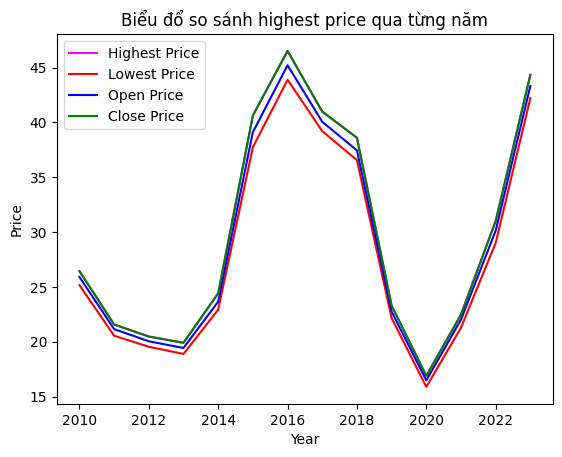

In [24]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
plt.plot(years, df_high_year, color='magenta')
plt.plot(years, df_low_year, color='red')
plt.plot(years, df_open_year, color='blue')
plt.plot(years, df_close_year, color='green')
plt.gca().set(title= "Biểu đổ so sánh highest price qua từng năm", xlabel= "Year", ylabel= "Price")
plt.legend(["Highest Price", "Lowest Price", "Open Price", "Close Price"])
plt.show()

Nhận Xét:
- Giữa 4 thuộc tính có mối quan hệ tương quan đồng biến với nhau.
- Sự thay đổi của 4 thuộc tính tương tự biểu đồ Highest Price qua từng năm ở phía trên.
- Các kỹ thuật được áp dụng: Manipulate View (Sử dụng màu sắc khác nhau, định dạng biểu đồ, thay đổi tiêu đề, chú thích biểu đồ). Sử dụng màu sắc khác nhau giúp phân biệt các đường với nhau, chú thích biểu đồ để biểu đồ dễ hiểu.
- Sự tương quan giữa 4 thuộc tính là những yếu tố quan trọng ảnh hưởng đến giá vàng, hiểu được các thuộc tính này giúp ích cho ta trong việc đầu tư.

#### Sự thay đổi của Highest Price trước và sau Covid-19

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\2880568888.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before_Covid = df_year[df["Date"] < '01-01-2019']
C:\Users\HP\AppData\Local\Temp\ipykernel_6444\2880568888.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after_Covid = df_year[df["Date"] >= '01-01-2019']


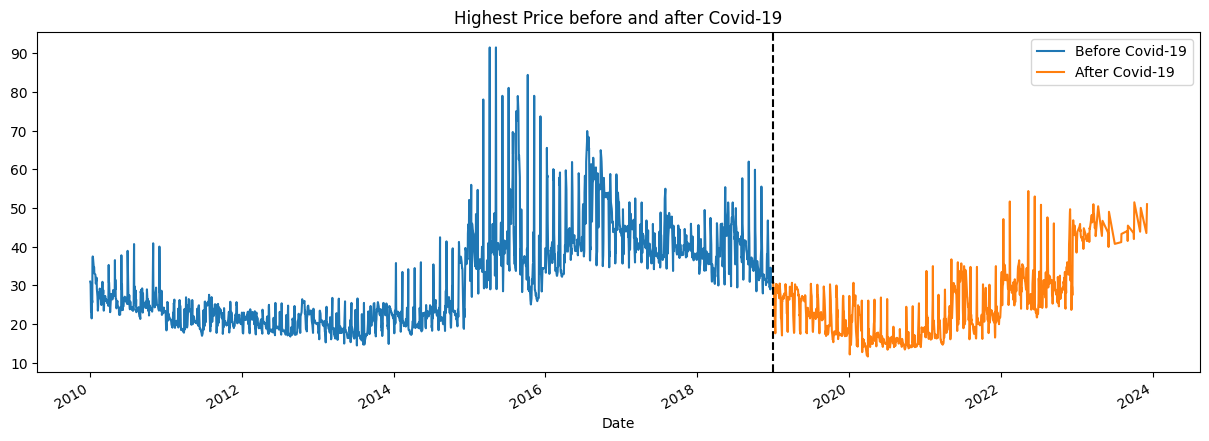

In [10]:
before_Covid = df_year[df["Date"] < '01-01-2019']
after_Covid = df_year[df["Date"] >= '01-01-2019']
before_Covid_high = before_Covid[["Date", "High"]].set_index('Date')
after_Covid_high = after_Covid[["Date", "High"]].set_index('Date')
fig, ax = plt.subplots(figsize = (15,5))
before_Covid_high.plot(ax = ax, label = "Before Covid-19", title = "Highest Price before and after Covid-19")
after_Covid_high.plot(ax = ax, label = "After Covid-19")
ax.axvline('2019-01-01', color = 'black', ls = '--')
ax.legend(['Before Covid-19', 'After Covid-19'])
plt.show()

##### Nhận Xét: 
- Ta sử dụng 2 màu để phân biệt giữa 2 giai đoạn trước và sau Covid-19.
- Highest Price giảm trong giai đoạn dịch và bắt đầu phục hồi sau dịch.
- Các kỹ thuật được áp dụng: Manipulate View (Thay đổi màu sắc, định dạng biểu đồ, thay đổi tiêu đề, chú thích ). Ta chia 2 giai đoạn thành 2 màu khác nhau và ngăn cách bởi 1 mốc thời gian giúp ta so sánh rõ hơn sự thay đổi của 2 giai đoạn.
- Từ biểu đồ, ta có thể thấy được sự thay đổi giữa 2 giai đoạn giúp ích nhiều cho việc đầu tư.

#### B. No. of Shares và No. of Trades qua các năm

##### Tính trung bình của No. of Shares và No. of Trades qua từng năm

In [11]:
# No. of Shares qua tùng năm
df_shares_year = df_year.groupby('Year')['No. of Shares'].mean()

# No. of Trades
df_trades_year = df_year.groupby('Year')['No. of Trades'].mean()

##### Vẽ biểu đồ so sánh
- Biểu đồ biểu diễn: Biểu đồ cột.
- Nguyên nhân: Biểu đồ cột giúp ta biểu diễn được khối lượng của 1 biến và dễ so sánh với các biến khác về khối lượng.

Text(0.5, 1.0, 'Biểu đồ biểu diễn No. of Shares và No. of Trades qua từng năm')

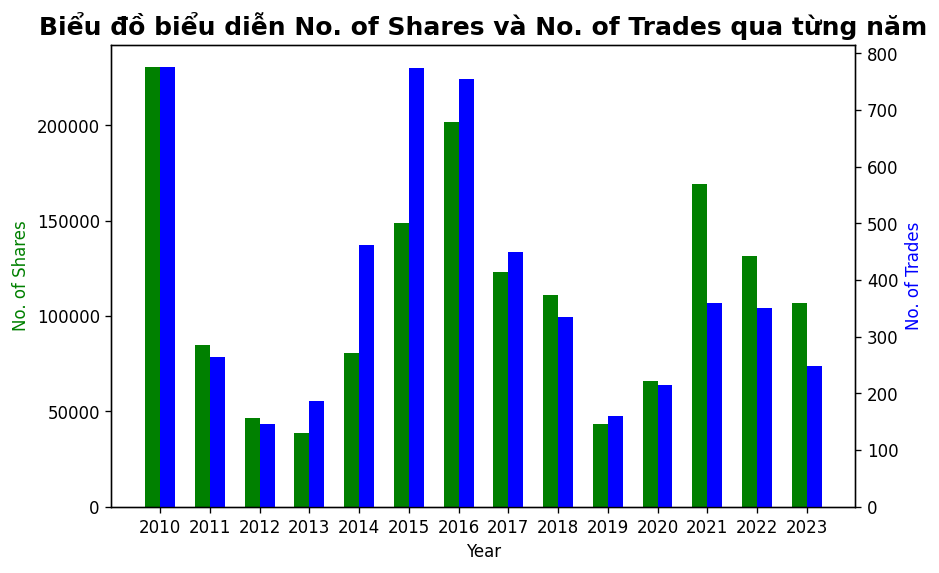

In [12]:
fig, ax1 = plt.subplots(1,1,figsize = (8,5), dpi = 120)
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(years))
r2 = [x + bar_width for x in r1]

ax1.bar(r1 ,df_shares_year, color = "green", width=bar_width)
ax1.set_xlabel('Year', fontsize = 10)
ax1.set_ylabel('No. of Shares', color = "green", fontsize = 10)

ax2  = ax1.twinx()
ax2.bar(r2 , df_trades_year, color = "blue", width=bar_width)
ax2.set_ylabel('No. of Trades', color = "blue", fontsize = 10)

plt.xticks([r + (bar_width / 2) for r in r1], years)
plt.title("Biểu đồ biểu diễn No. of Shares và No. of Trades qua từng năm", fontsize = 15, fontweight = "bold")

##### Nhận Xét:
- Ta có thể thấy No. of Shares và No. of Trades có mối tương quan đồng biến với nhau khi cả 2 cùng tăng hoặc cùng giảm.
- No. of Shares và No. of Trades có sự thay đổi nhiều qua từng năm.
- Tương tự, ta thấy sự thay đổi trước và sau Covid-19 khi khối lượng cả No. of Shares và No. of Trades đều giảm trong giai đoạn dịch và hồi phục lại sau đại dịch.
- Kỹ thuật Maniputulate View: Sử dụng nhiều màu sắc, định dạng kích thước biểu đồ, thay đổi tiêu đề, chú thích biểu đồ. Sử dụng 2 màu để phân biệt 2 biểu đồ, chú thích 2 trục tung vì 2 thuộc tính có đại lượng khác nhau.
- Từ sự thay đổi tương quan của 2 thuộc tính giúp việc đầu tư.

#### Số giao dịch của ngày nào trong tháng là cao nhất 

Text(0.5, 1.0, 'No. of Trades by day')

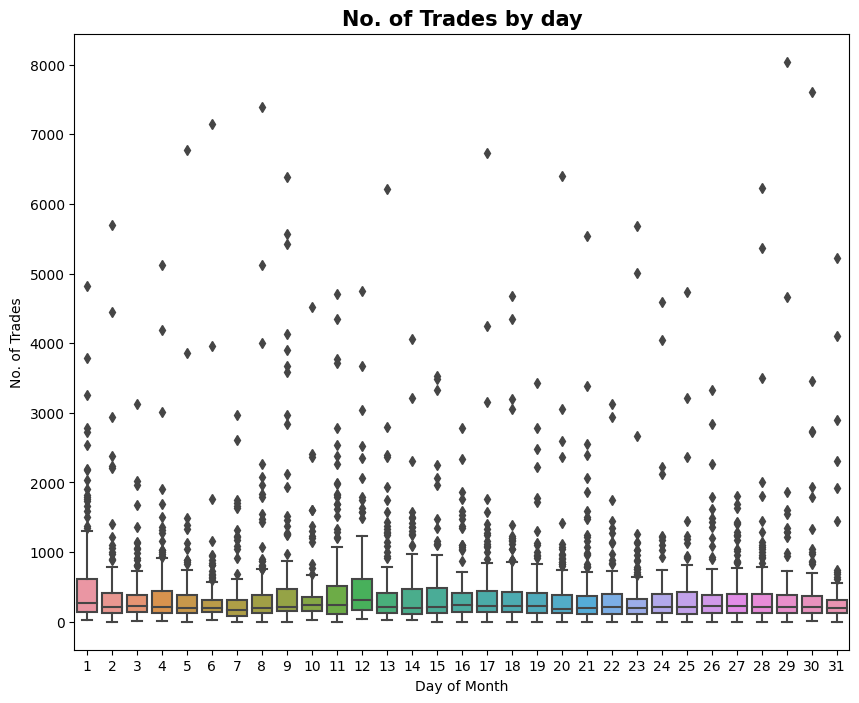

In [13]:
df['Day of Month'] = [d.day for d in df['Date']]

fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = df["Day of Month"], y = df["No. of Trades"])
ax.set_title("No. of Trades by day", fontsize = 15, fontweight = "bold")

##### Nhận xét:
- Dữ liệu có khá nhiều outliers.
- Từ biểu đồ, ta thấy khối lượng giao dịch ở đầu tháng là cao nhất. Cùng với đó ta biết nhà đầu tư thường đầu tư ở thời điểm nào trong tháng từ đó hỗ trợ cho đầu tư.
- Kỹ thuật Maniputulate View: Sử dụng nhiều màu sắc, chú thích tiêu đề. Sử dụng nhiều màu để phân biệt các ngày trong tháng.